In [59]:
"""%pip install pillow
%pip install opencv-python

%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install plotly
%pip install sklearn 
%pip install tensorflow
%pip install scikit-learn
%pip install glob
"""
import os
import shutil
import itertools
import pathlib
from PIL import *

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses, optimizers

import glob

import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import pandas as pd

train_data_path = '/Users/noraalaoui/Desktop/chest_xray/train'
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    
    # Skip if the path is not a directory
    if not os.path.isdir(f_path):
        continue
    
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='label')
df = pd.concat([Fseries, Lseries], axis=1)

In [5]:
df

,filepaths,label
0,/Users/noraalaoui/Desktop/chest_xray/train/PNE...,PNEUMONIA
1,/Users/noraalaoui/Desktop/chest_xray/train/PNE...,PNEUMONIA
2,/Users/noraalaoui/Desktop/chest_xray/train/PNE...,PNEUMONIA
3,/Users/noraalaoui/Desktop/chest_xray/train/PNE...,PNEUMONIA
4,/Users/noraalaoui/Desktop/chest_xray/train/PNE...,PNEUMONIA
...,...,...
5211,/Users/noraalaoui/Desktop/chest_xray/train/NOR...,NORMAL
5212,/Users/noraalaoui/Desktop/chest_xray/train/NOR...,NORMAL
5213,/Users/noraalaoui/Desktop/chest_xray/train/NOR...,NORMAL
5214,/Users/noraalaoui/Desktop/chest_xray/train/NOR...,NORMAL


In [6]:
test_data_path = '/Users/noraalaoui/Desktop/chest_xray/test'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test = pd.concat([Fseries , Lseries] , axis = 1)
test

,filepaths,label
0,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
1,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
2,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
3,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
4,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
...,...,...
619,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL
620,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL
621,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL
622,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL


In [7]:
valid_data_path = '/Users/noraalaoui/Desktop/chest_xray/valid'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
valid = pd.concat([Fseries , Lseries] , axis = 1)
valid

,filepaths,label
0,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
1,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
2,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
3,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
4,/Users/noraalaoui/Desktop/chest_xray/test/PNEU...,PNEUMONIA
...,...,...
619,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL
620,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL
621,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL
622,/Users/noraalaoui/Desktop/chest_xray/test/NORM...,NORMAL


In [8]:
data_dir = '/Users/noraalaoui/Desktop/chest_xray/train'
test_dir = '/Users/noraalaoui/Desktop/chest_xray/test'

IMAGE_SIZE = (256,256)

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing  Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [9]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA'] 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [10]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

In [11]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
tf.__version__

'2.15.0'

In [13]:
fig= px.histogram(data_frame= df,
           y= df['label'],
           template='plotly_dark',
           color= df['label'].values,
           title='number of images in each class of the train data')
fig.show()



In [14]:
fig= px.histogram(data_frame= test,
           y= test['label'],
           template='plotly_dark',
           color=test['label'].values,
           title='number of images in each class of the test data')
fig.show()

In [15]:
fig= px.histogram(data_frame= valid,
           y= valid['label'],
           template='plotly_dark',
           color=valid['label'].values,
           title='number of images in each class of the valid data')
fig.show()

In [16]:
train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle= True, random_state= 42)
valid_df, test_df= train_test_split(dummy_df, train_size= 0.6, shuffle= True, random_state= 42)

In [17]:
img_size = (224 ,224)
batch_size = 16
img_shape= (img_size[0], img_size[1], 3)

def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)
valid_gen = ts_gen.flow_from_dataframe(valid_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)
test_gen = ts_gen.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)


Found 4172 validated image filenames belonging to 2 classes.
Found 626 validated image filenames belonging to 2 classes.
Found 418 validated image filenames belonging to 2 classes.


In [18]:
normal_paths = glob.glob(train_data_path + "/NORMAL/*.jpeg")
pneumonia_paths = glob.glob(train_data_path + "/PNEUMONIA/*.jpeg")

# Check the number of images loaded for each class
print("Number of normal images:", len(normal_paths))
print("Number of pneumonia images:", len(pneumonia_paths))


Number of normal images: 1341
Number of pneumonia images: 3875


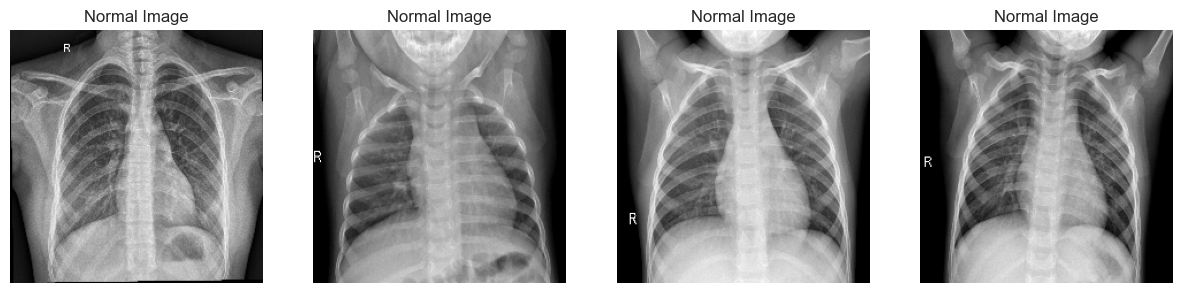

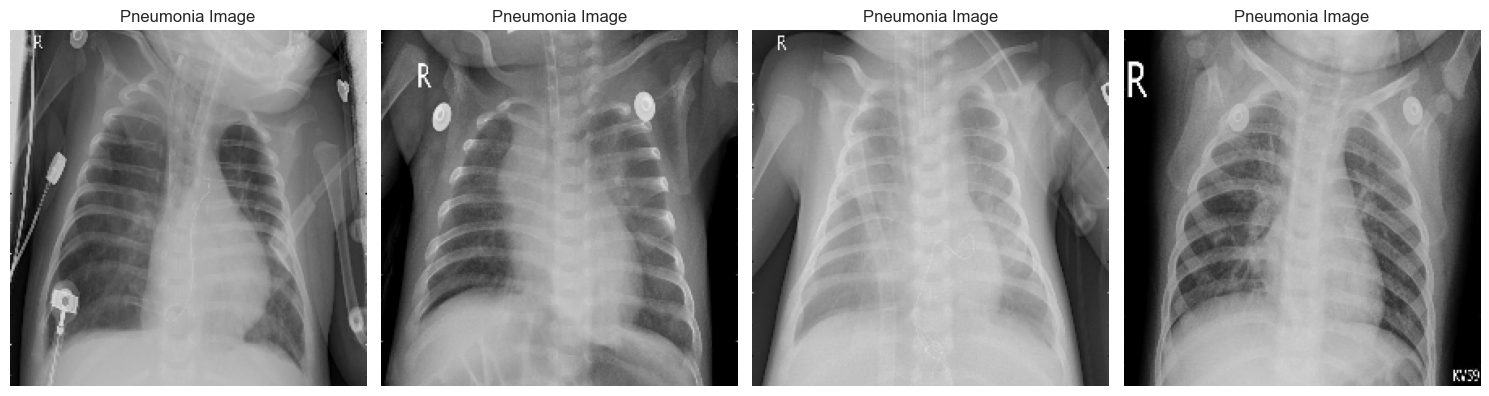

In [19]:

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_paths[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Normal Image")
    
    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_paths[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Pneumonia Image")
fig.tight_layout()    
plt.show()

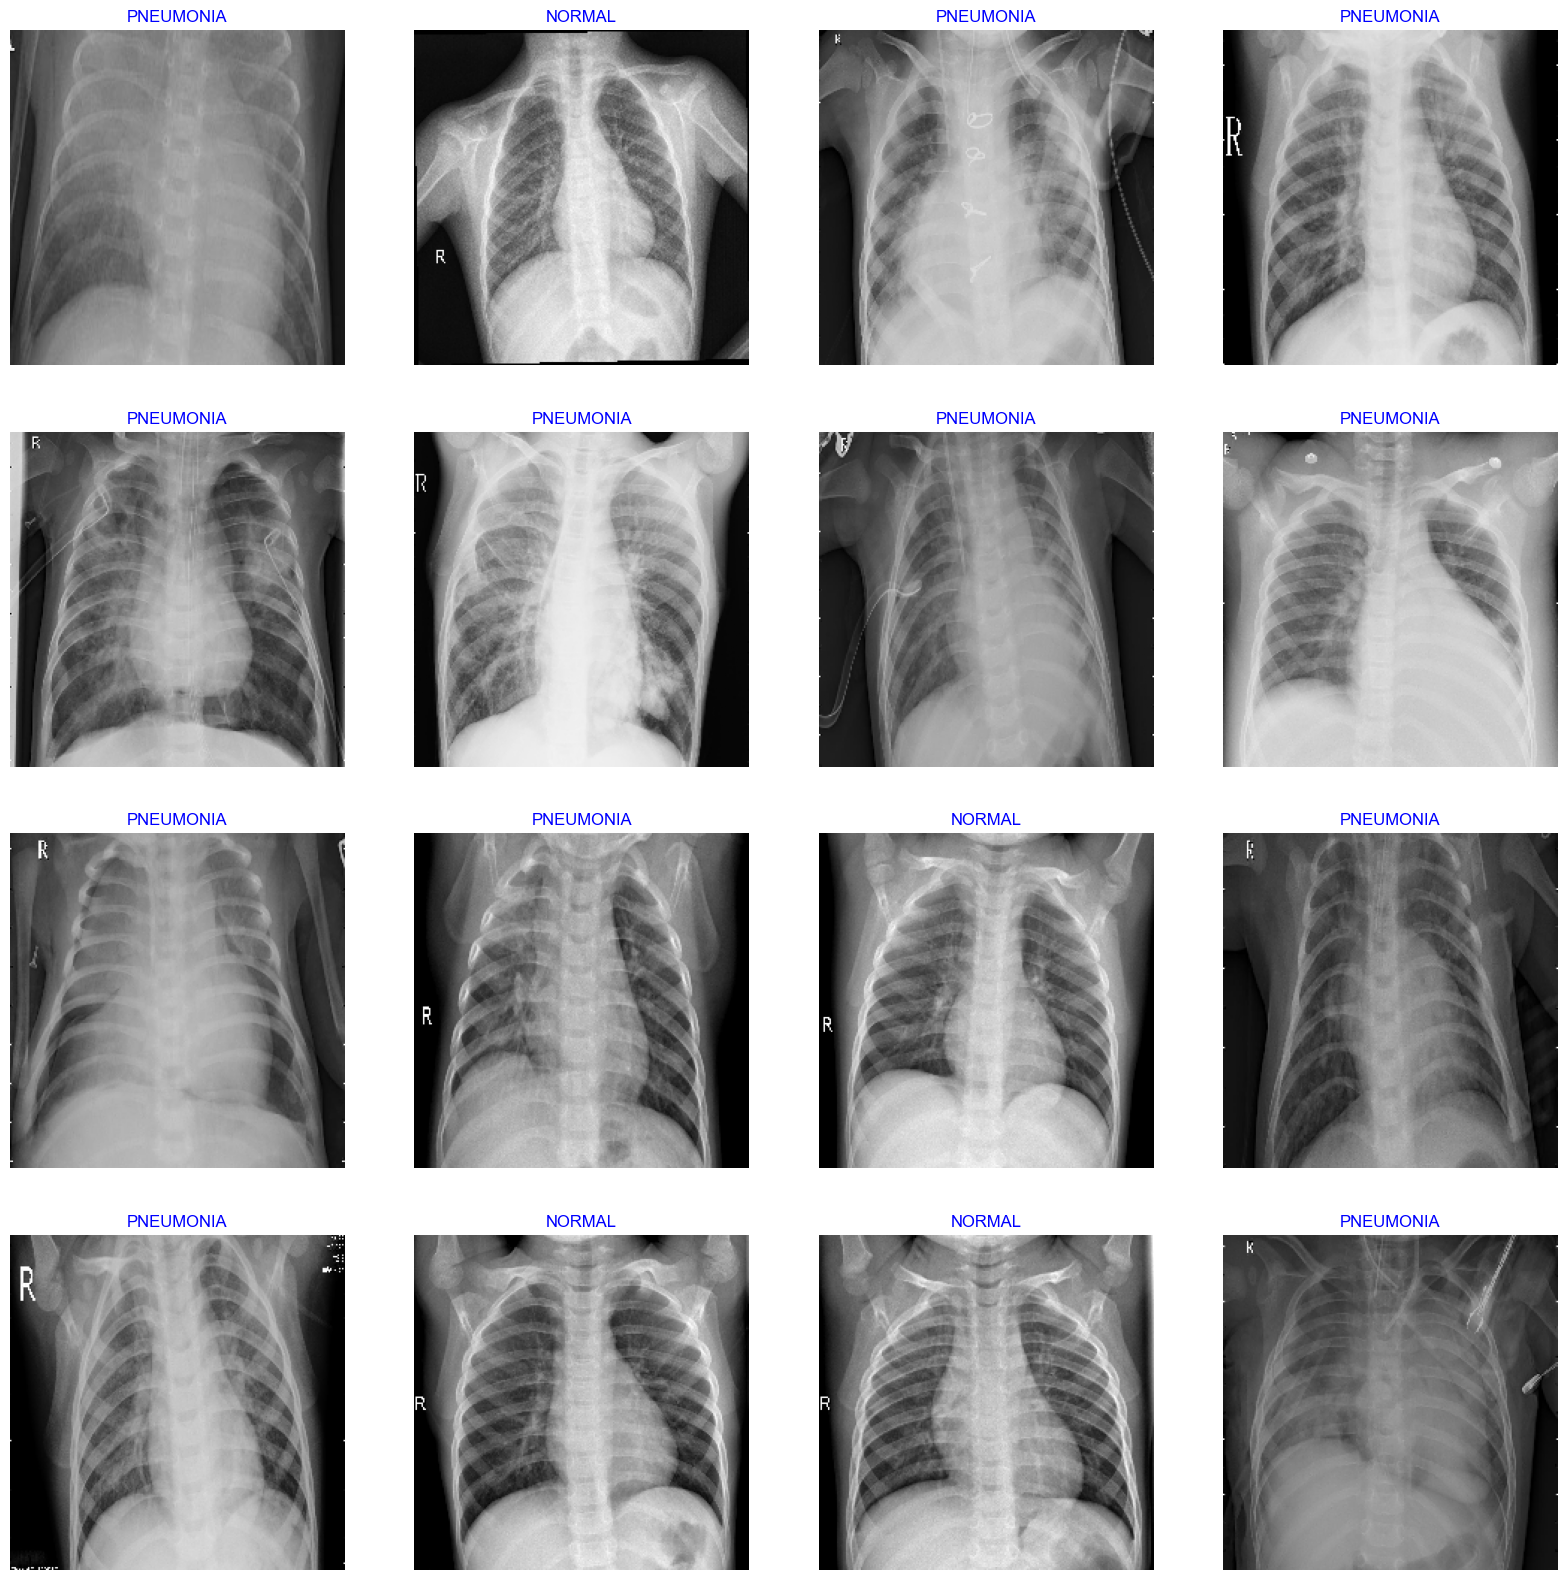

In [20]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show()

In [21]:
img_size = (224, 224)
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet',input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])
model.compile(Adamax(learning_rate = 0.0001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 11183665 (42.66 MB)
Trainable params: 1109

In [22]:
Epochs = 10
history = model.fit(x= train_gen , epochs = Epochs, verbose = 1, validation_data= valid_gen,validation_steps = None , shuffle = False)

Epoch 1/10
261/261 [==============================] - 2425s 9s/step - loss: 7.7934 - accuracy: 0.8241 - val_loss: 7.2873 - val_accuracy: 0.8674
Epoch 2/10
261/261 [==============================] - 7122s 27s/step - loss: 6.7715 - accuracy: 0.9283 - val_loss: 6.5640 - val_accuracy: 0.8387
Epoch 3/10
261/261 [==============================] - 1490s 6s/step - loss: 6.0133 - accuracy: 0.9444 - val_loss: 5.6418 - val_accuracy: 0.9553
Epoch 4/10
261/261 [==============================] - 902s 3s/step - loss: 5.2915 - accuracy: 0.9588 - val_loss: 4.9790 - val_accuracy: 0.9760
Epoch 5/10
261/261 [==============================] - 955s 4s/step - loss: 4.7121 - accuracy: 0.9624 - val_loss: 4.4661 - val_accuracy: 0.9712
Epoch 6/10
261/261 [==============================] - 929s 4s/step - loss: 4.2540 - accuracy: 0.9691 - val_loss: 4.0466 - val_accuracy: 0.9760
Epoch 7/10
261/261 [==============================] - 949s 4s/step - loss: 3.8897 - accuracy: 0.9732 - val_loss: 3.7206 - val_accuracy: 0.

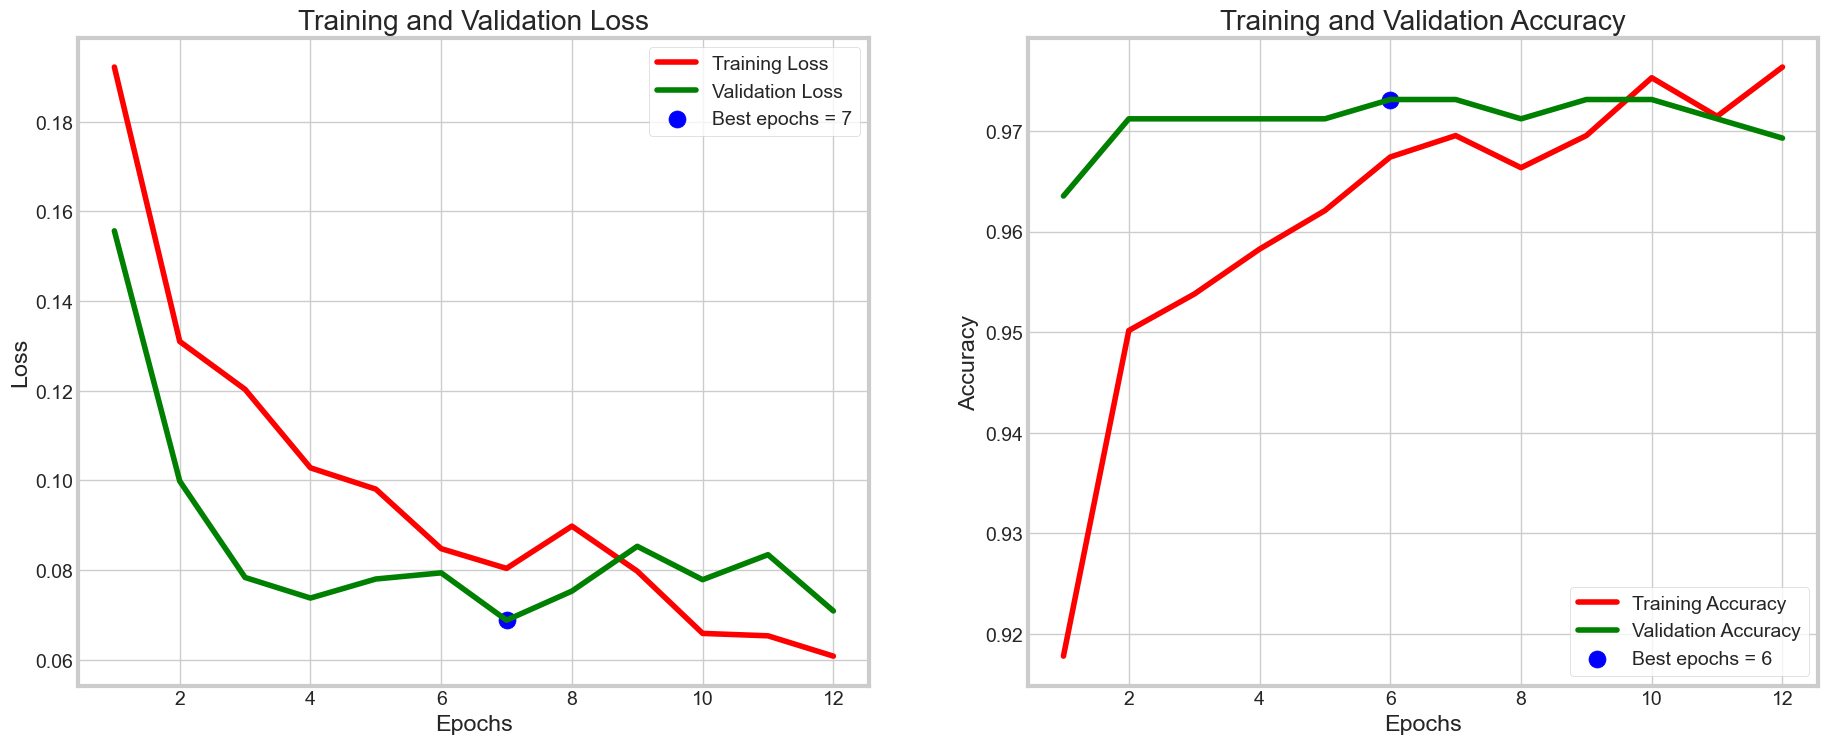

In [99]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))


plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [24]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 12s 740ms/step - loss: 2.9085 - accuracy: 0.9922
Train Loss:  2.8954355716705322
Train Accuracy:  0.99609375
--------------------
Validation Loss:  2.9300343990325928
Validation Accuracy:  0.98046875
--------------------
Test Loss:  2.908506393432617
Test Accuracy:  0.9921875


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)

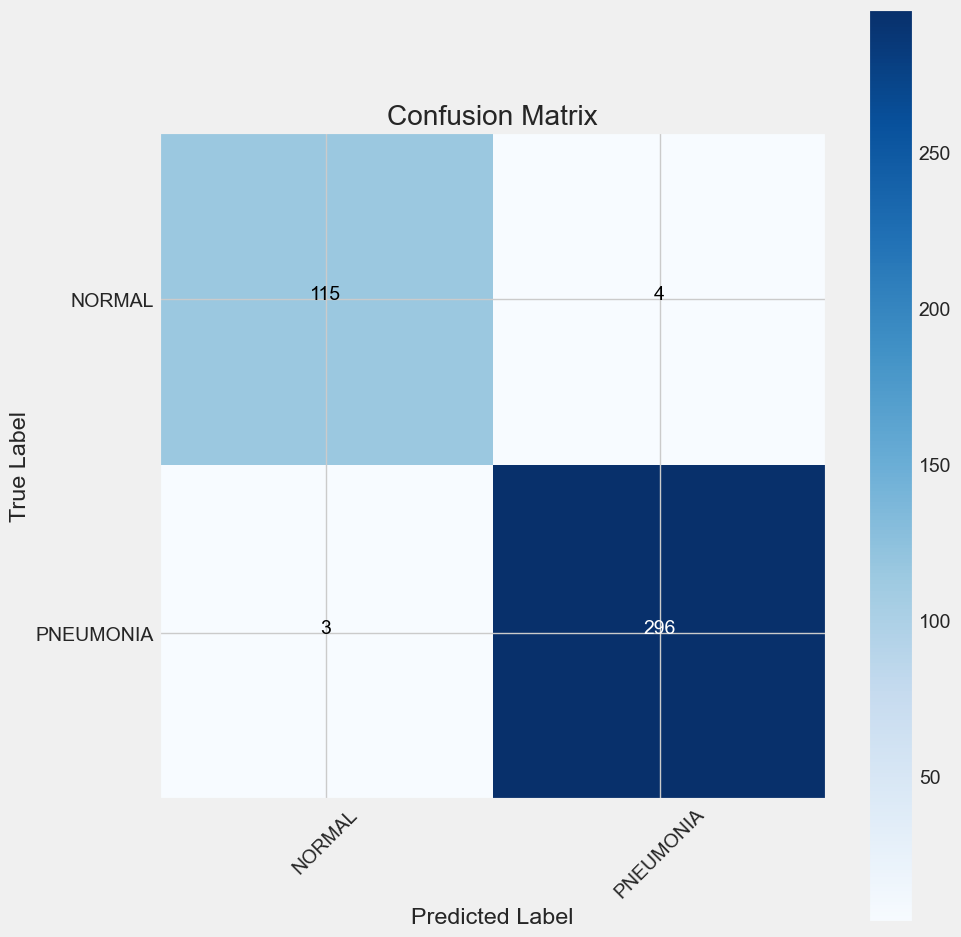

In [27]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [28]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      NORMAL       0.97      0.97      0.97       119
   PNEUMONIA       0.99      0.99      0.99       299

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [30]:
pixel_data = {'actual_class': y_pred}
for k in range(0,2):
    pixel_data[f"pix_val_{k}"] = preds[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,1.000,1.000,1.000,0.00,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.00,1.000
pix_val_0,0.017,0.018,0.046,0.93,0.017,0.019,0.527,0.981,0.019,0.993,0.936,0.022,0.037,0.02,0.018
pix_val_1,0.983,0.982,0.954,0.07,0.983,0.981,0.473,0.019,0.981,0.007,0.064,0.978,0.963,0.98,0.982


In [31]:
pixel_df.pix_val_0.value_counts()

pix_val_0
0.017356    1
0.019028    1
0.019141    1
0.022103    1
0.971799    1
           ..
0.014878    1
0.029288    1
0.018969    1
0.985577    1
0.028607    1
Name: count, Length: 418, dtype: int64

In [32]:
pixel_df.pix_val_1.value_counts()

pix_val_1
0.982644    1
0.980972    1
0.980859    1
0.977897    1
0.028201    1
           ..
0.985122    1
0.970712    1
0.981031    1
0.014423    1
0.971393    1
Name: count, Length: 418, dtype: int64

In [33]:
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,1.000,1.000,1.000,0.00,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.00,1.000
pix_val_0,0.017,0.018,0.046,0.93,0.017,0.019,0.527,0.981,0.019,0.993,0.936,0.022,0.037,0.02,0.018
pix_val_1,0.983,0.982,0.954,0.07,0.983,0.981,0.473,0.019,0.981,0.007,0.064,0.978,0.963,0.98,0.982


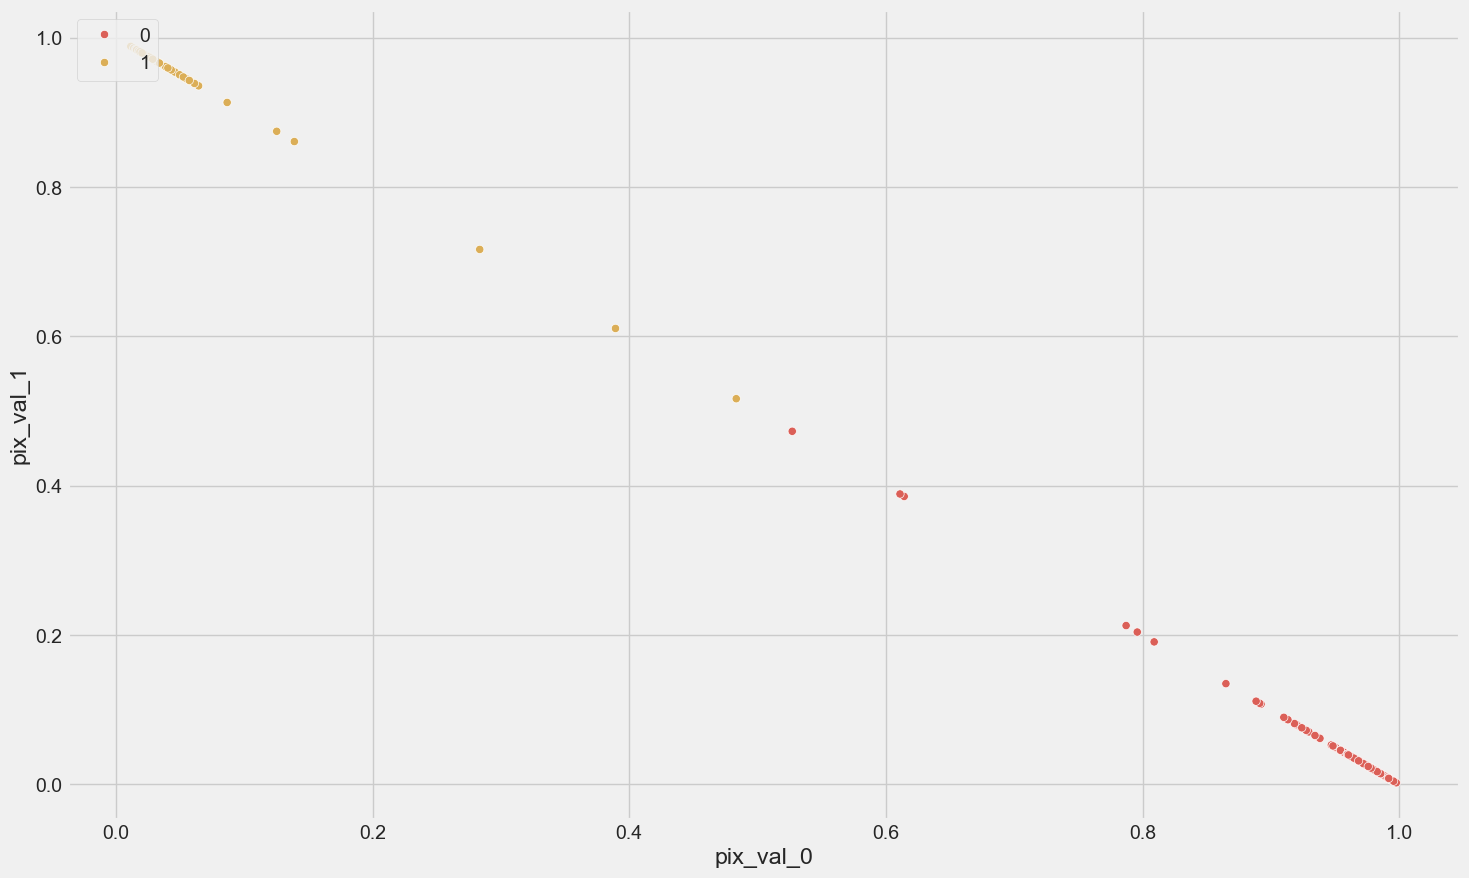

In [34]:
## Use a scatter plot to visualize the predicive power of the pixel values at two fixed locations in the image, i.e. how well the pixel values at two fixed locations in the image "predict" the class labels.

plt.figure(figsize=(16, 10))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="pix_val_0", y="pix_val_1", hue="actual_class",  palette=color, data = pixel_df, legend="full")
plt.legend(loc='upper left');

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score


features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df.loc[:, features].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)

pixel_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,-0.383,0.0,1
1,-0.381,0.0,1
2,-0.342,-0.0,1
3,0.907,0.0,0
4,-0.384,0.0,1


In [36]:
pca.explained_variance_ratio_

array([1.0000000e+00, 6.9278816e-15], dtype=float32)

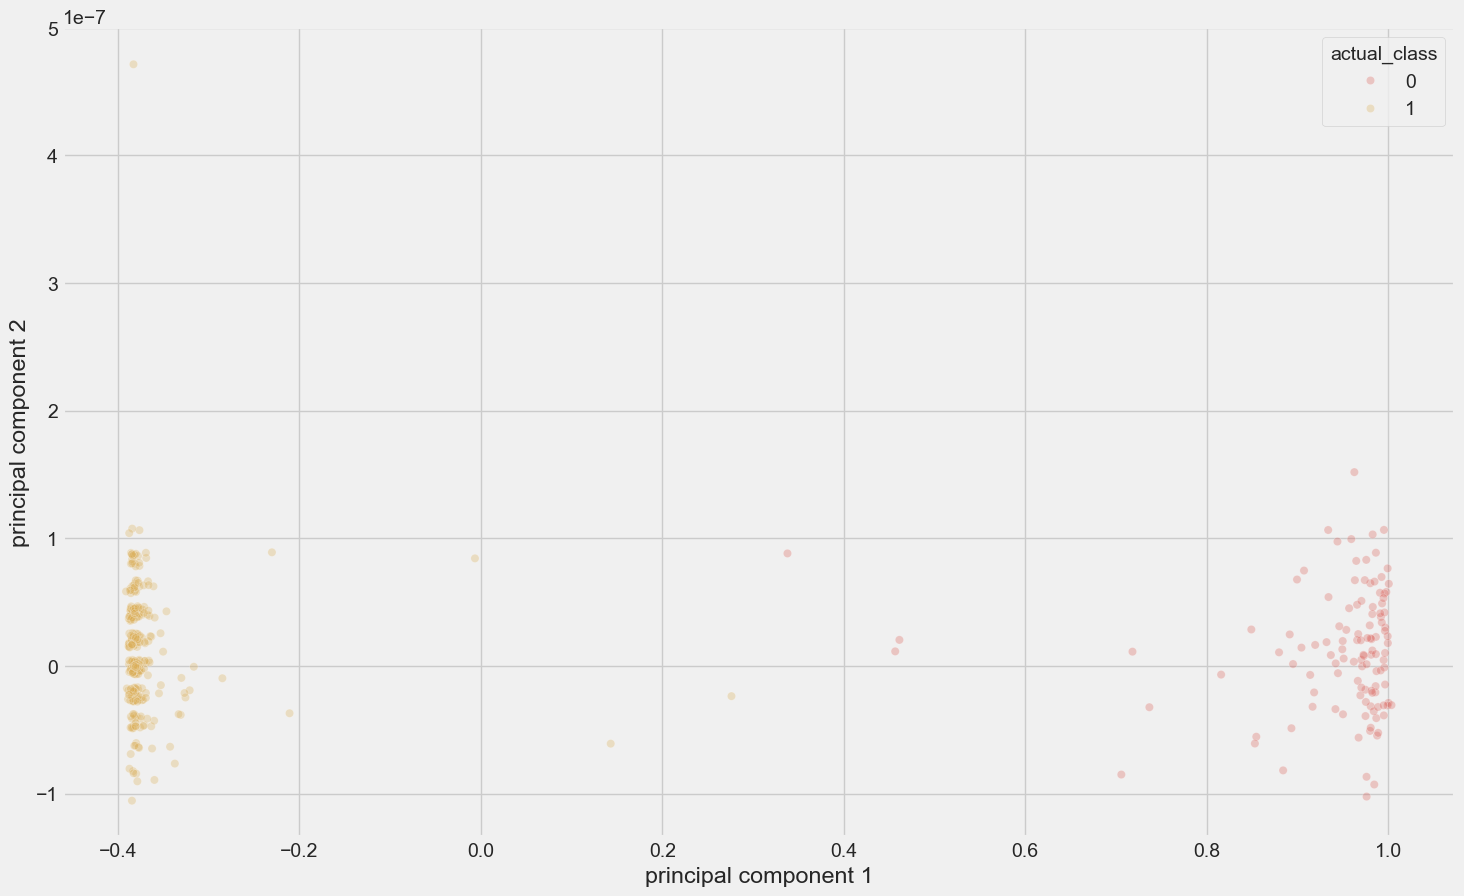

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

In [40]:
"""Reducing dimensionality of the data with Random Forests
We produce a heat map to visual the relative importance of the features (using code from Hands On Machine Learning by A. Geron). 
Finally, we select the 70 most important feature (pixels) from the training, validation and test images to test our 'best' model on."""

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)


In [102]:
"""for i, tree in enumerate(rnd_clf.estimators_):
    print(f"Feature importances for Tree {i}:")
    for j, importance in enumerate(tree.feature_importances_):
        print(f"Feature {j}: Importance {importance}")"""

'for i, tree in enumerate(rnd_clf.estimators_):\n    print(f"Feature importances for Tree {i}:")\n    for j, importance in enumerate(tree.feature_importances_):\n        print(f"Feature {j}: Importance {importance}")'

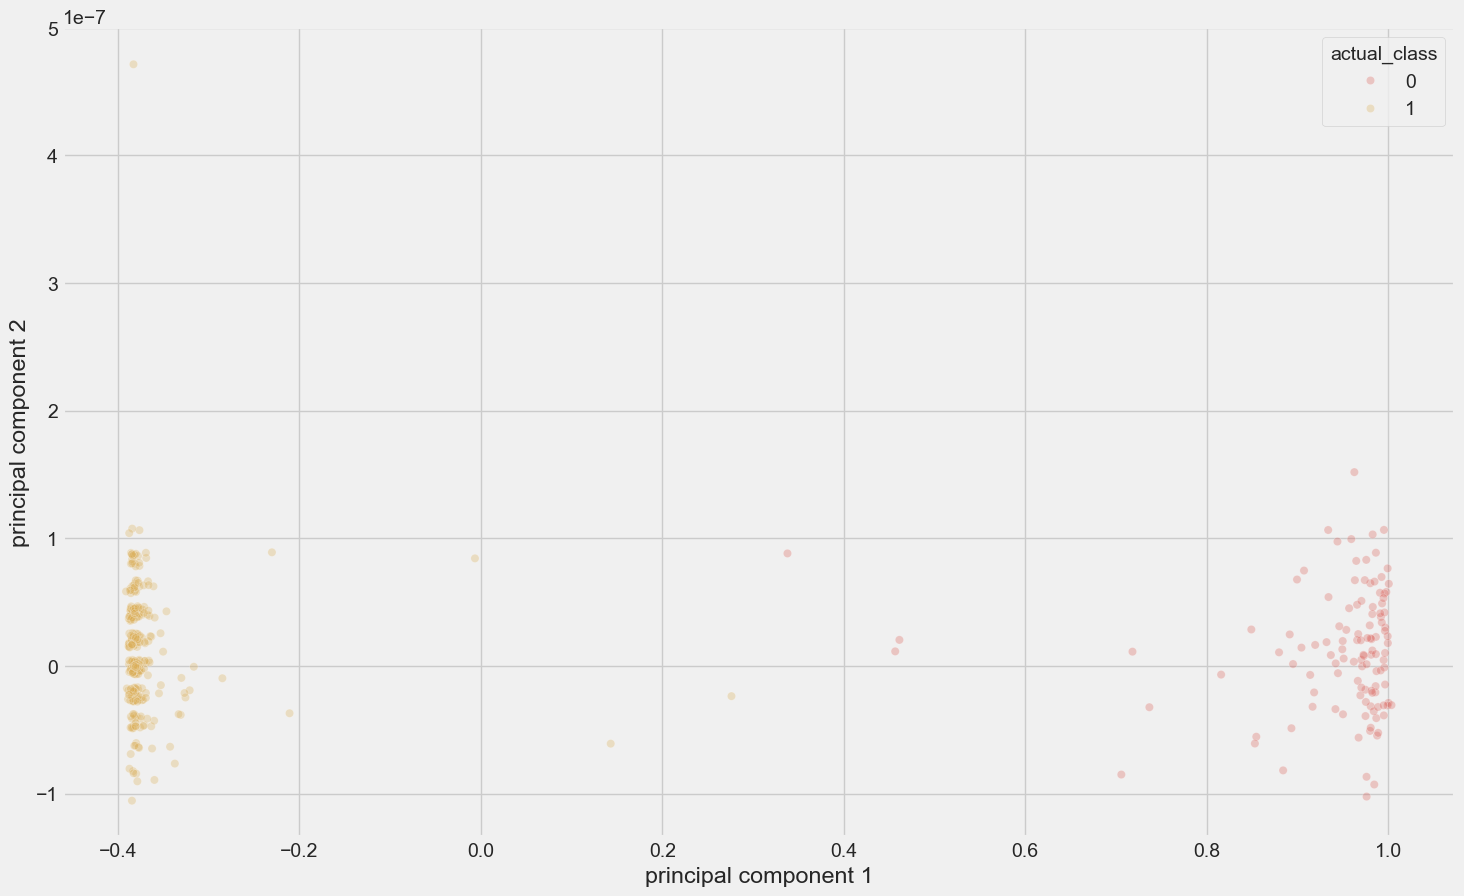

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

In [43]:
def plot_digit(data):
    image = data.reshape(418,2)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

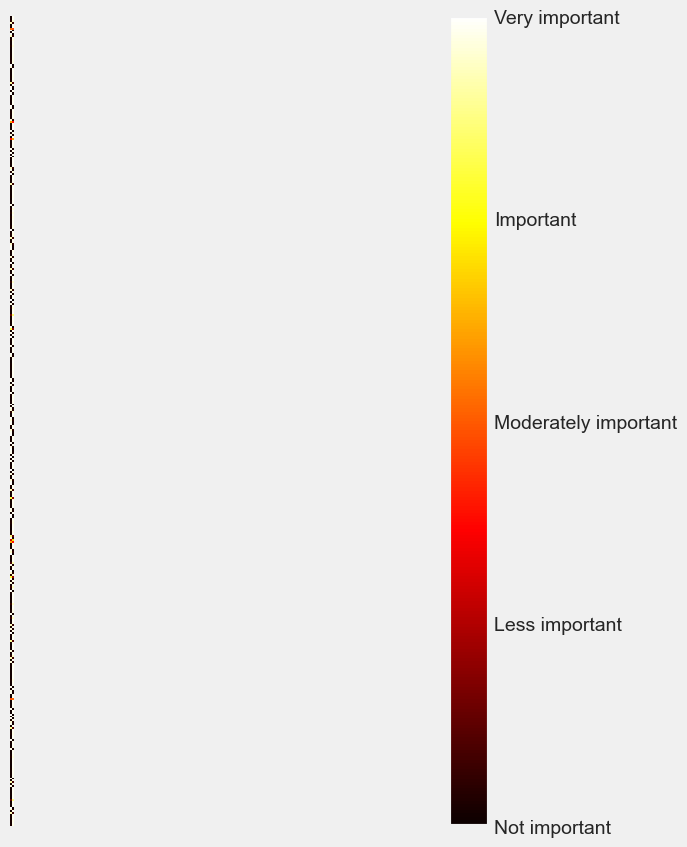

In [44]:

ticks = np.linspace(preds.min(), preds.max(), num=5)  # Adjust num as needed
plt.figure(figsize=(100, 10))
plot_digit(preds)

# Create color bar with specific ticks
cbar = plt.colorbar(ticks=ticks)
cbar.ax.set_yticklabels(['Not important', 'Less important', 'Moderately important', 'Important', 'Very important'])

plt.show()

In [45]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")

In [46]:
def visualize_images(path, num_images=5):
    image_filenames = os.listdir(path)
    num_images = min(num_images, len(image_filenames))
    
    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')
    
    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

In [47]:
# Load the Xception base model without the top (classification) layer
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
base_model.trainable = False

# Build Model 
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dropout(0.45)) 
model.add(Dense(220, activation='relu'))
model.add(Dropout(0.25)) 
model.add(Dense(60,activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_5 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 220)               450780    
                                                                 
 dropout_2 (Dropout)         (None, 220)               0         
                                                                 
 dense_3 (Dense)             (None, 60)                13260     
                                                      

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit_generator(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20
147/147 [==============================] - 224s 1s/step - loss: 0.1922 - accuracy: 0.9178 - val_loss: 0.1557 - val_accuracy: 0.9635
Epoch 2/20
147/147 [==============================] - 28561s 196s/step - loss: 0.1310 - accuracy: 0.9502 - val_loss: 0.0998 - val_accuracy: 0.9712
Epoch 3/20
147/147 [==============================] - 8767s 60s/step - loss: 0.1203 - accuracy: 0.9538 - val_loss: 0.0783 - val_accuracy: 0.9712
Epoch 4/20
147/147 [==============================] - 6613s 45s/step - loss: 0.1028 - accuracy: 0.9583 - val_loss: 0.0737 - val_accuracy: 0.9712
Epoch 5/20
147/147 [==============================] - 198s 1s/step - loss: 0.0980 - accuracy: 0.9621 - val_loss: 0.0780 - val_accuracy: 0.9712
Epoch 6/20
147/147 [==============================] - 200s 1s/step - loss: 0.0848 - accuracy: 0.9674 - val_loss: 0.0794 - val_accuracy: 0.9731
Epoch 7/20
147/147 [==============================] - 200s 1s/step - loss: 0.0804 - accuracy: 0.9695 - val_loss: 0.0688 - val_accuracy

In [49]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 [==============================] - 18s 1s/step - loss: 0.0688 - accuracy: 0.9731
Validation Loss: 0.06880591064691544
Validation Accuracy: 0.973128616809845


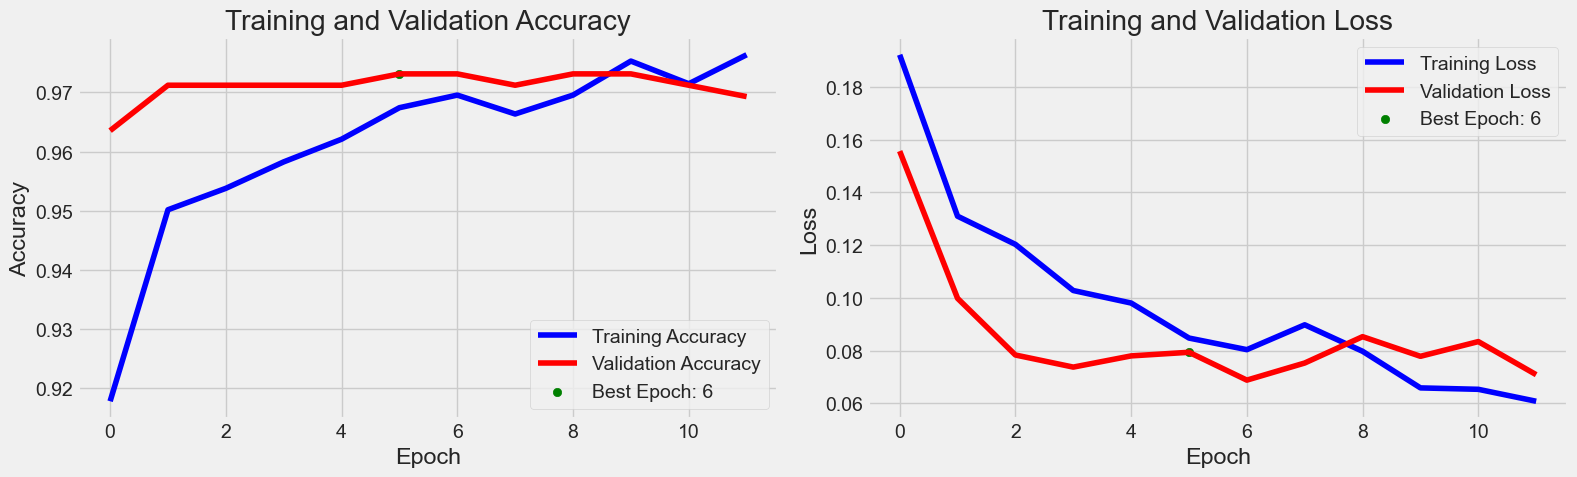

In [50]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [52]:
def combine_classification_reports(reports):
    combined_report = pd.concat(reports)
    aggregated_report = combined_report.groupby(level=0).mean()
    print(aggregated_report)

reports = model.summary, model_3.summary

combine_classification_reports(reports)




In [67]:
model_3 =Sequential([
    layers.Input(shape=(256 , 256, 3)) , 
    layers.Conv2D( 8 , 3 , kernel_regularizer='l2' , padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(),
    layers.Conv2D( 16, 3,kernel_regularizer='l2', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu') ,
    layers.MaxPool2D(),

    layers.Conv2D( 32, 3,kernel_regularizer='l2', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu') ,  
    layers.MaxPool2D() , 

    layers.Flatten(), 
    layers.Dense(100  , activation='relu',kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(20  , activation='relu',kernel_regularizer='l2'),
    layers.Dropout(0.3),

    layers.Dense(1 , activation='sigmoid')

])
model_3.trainable = False

model_3.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 batch_normalization_15 (Ba  (None, 256, 256, 8)       32        
 tchNormalization)                                               
                                                                 
 activation_9 (Activation)   (None, 256, 256, 8)       0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 128, 128, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 batch_normalization_16 (Ba  (None, 128, 128, 16)     

In [68]:
history_3 = model_3.fit_generator(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20


147/147 [==============================] - 21s 136ms/step - loss: 3.4495 - accuracy: 0.3747 - val_loss: 3.4375 - val_accuracy: 0.2361
Epoch 2/20
147/147 [==============================] - 20s 136ms/step - loss: 3.4473 - accuracy: 0.3808 - val_loss: 3.4375 - val_accuracy: 0.2361
Epoch 3/20
147/147 [==============================] - 21s 138ms/step - loss: 3.4483 - accuracy: 0.3687 - val_loss: 3.4375 - val_accuracy: 0.2361
Epoch 4/20
147/147 [==============================] - 19s 128ms/step - loss: 3.4482 - accuracy: 0.3736 - val_loss: 3.4375 - val_accuracy: 0.2361
Epoch 5/20
147/147 [==============================] - 19s 125ms/step - loss: 3.4506 - accuracy: 0.3565 - val_loss: 3.4375 - val_accuracy: 0.2361
Epoch 6/20
147/147 [==============================] - 20s 133ms/step - loss: 3.4507 - accuracy: 0.3563 - val_loss: 3.4375 - val_accuracy: 0.2361
Epoch 7/20
147/147 [==============================] - 20s 132ms/step - loss: 3.4502 - accuracy: 0.3655 - val_loss: 3.4375 - val_accuracy: 0.2

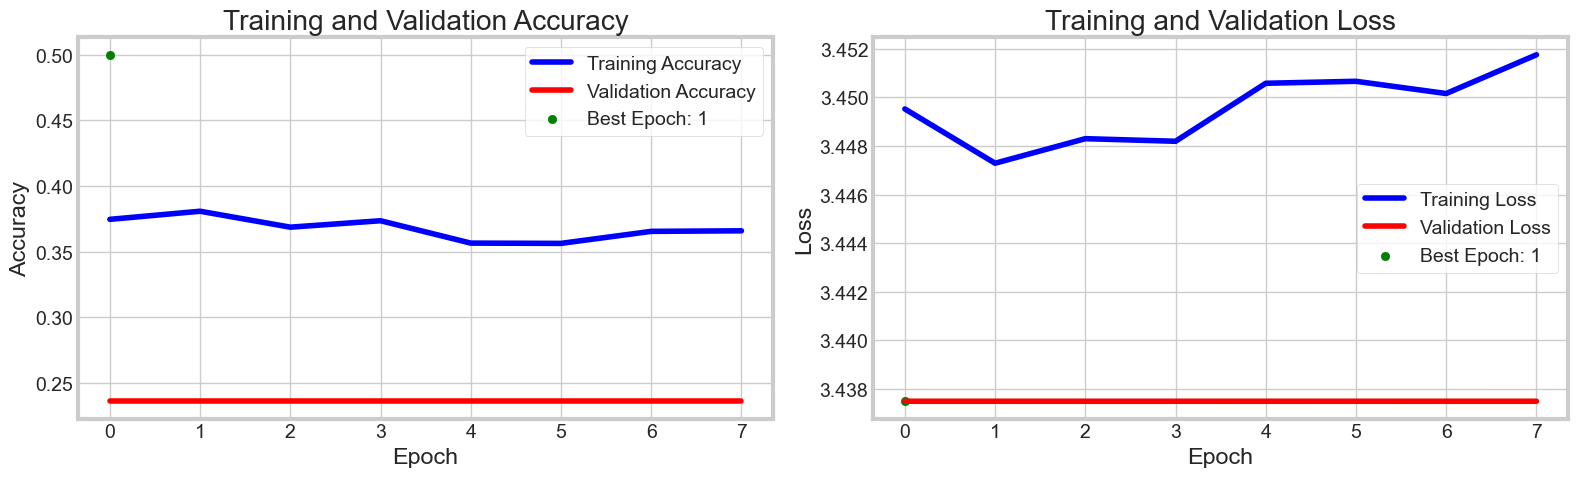

In [122]:
best_epoch = history_3.history['val_accuracy'].index(max(history_3.history['val_accuracy'])) + 1


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history_3.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history_3.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history_3.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history_3.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history_3.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

# Define input size
input_shape = (256, 256, 3)  # Example input size, adjust as needed

# Define batch size
batch_size = 64

# Define number of classes
num_classes = 10

# Define number of epochs
epochs = 10

# Create the model
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))
num_classes = 1  # For binary classification
model_4.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
optimizer = optimizers.Adam()  # Example optimizer, you can change this
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_4.trainable = False


# Display model summary
model_4.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 flatten_6 (Flatten)         (None, 516128)            0         
                                                                 
 dense_21 (Dense)            (None, 256)               132129024 
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                      

In [78]:
history_4 = model_4.fit(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20


147/147 [==============================] - 233s 2s/step - loss: 0.0000e+00 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.2361
Epoch 2/20
147/147 [==============================] - 204s 1s/step - loss: 0.0000e+00 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.2361
Epoch 3/20
147/147 [==============================] - 198s 1s/step - loss: 0.0000e+00 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.2361
Epoch 4/20
147/147 [==============================] - 197s 1s/step - loss: 0.0000e+00 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.2361
Epoch 5/20
147/147 [==============================] - 198s 1s/step - loss: 0.0000e+00 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.2361
Epoch 6/20
147/147 [==============================] - 199s 1s/step - loss: 0.0000e+00 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.2361


In [79]:
###model_4 is awful so I'm not continuing with it

In [117]:
base_model = keras.applications.EfficientNetV2B2(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)



input_shape = (256, 256, 3) 

# Define your model
model_5 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2B2(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,  # Add input shape here
        pooling='avg'
    ),
    BatchNormalization(),
    Dropout(0.45),
    Dense(220, activation='relu'),
    Dropout(0.25),
    Dense(60, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [118]:
model_5.compile(Adamax(learning_rate = 0.0001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [119]:
Epochs = 10  # Example: Set the number of epochs to 10
model_5.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Epochs = 10
history_5 = model_5.fit(
    x=train_gen,
    epochs=Epochs,
    verbose=1,
    validation_data=valid_gen,
    shuffle=False
)



Epoch 1/10
261/261 [==============================] - 509s 2s/step - loss: 0.7817 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/10
261/261 [==============================] - 502s 2s/step - loss: 0.7223 - accuracy: 0.5000 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 3/10
261/261 [==============================] - 504s 2s/step - loss: 0.7086 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 4/10
261/261 [==============================] - 464s 2s/step - loss: 0.7006 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/10
261/261 [==============================] - 497s 2s/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
261/261 [==============================] - 442s 2s/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
261/261 [==============================] - 1808s 7s/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.500

In [101]:
validation_loss, validation_accuracy = model_5.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 [==============================] - 16s 797ms/step - loss: 0.6926 - accuracy: 0.7639
Validation Loss: 0.6926052570343018
Validation Accuracy: 0.7639155387878418


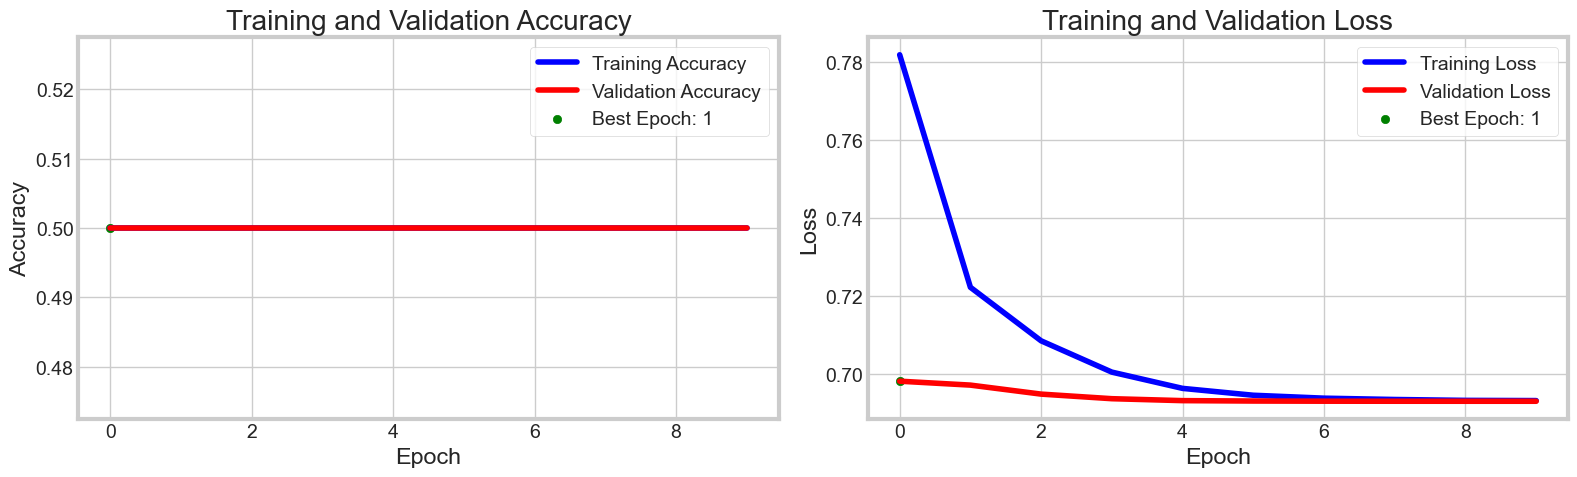

In [120]:
best_epoch = history_5.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history_5.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history_5.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history_5.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history_5.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history_5.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [106]:
## I didnt like that model even though it was fairly accurate
base_model = EfficientNetB1(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
base_model.trainable = False

# Build Model 
model_6 = Sequential()
model_6.add(base_model)
model_6.add(BatchNormalization())
model_6.add(Dropout(0.45)) 
model_6.add(Dense(220, activation='relu'))
model_6.add(Dropout(0.25)) 
model_6.add(Dense(60,activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))


model_6.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_6.summary()

27018416/27018416 [==============================] - 1s 0us/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 1280)              6575239   
 )                                                               
                                                                 
 batch_normalization_21 (Ba  (None, 1280)              5120      
 tchNormalization)                                               
                                                                 
 dropout_23 (Dropout)        (None, 1280)              0         
                                                                 
 dense_33 (Dense)            (None, 220)               281820    
                                                                 
 dropout_24 (Dropout)        (None, 220)               0         
                                                      

In [107]:
Epochs = 10
history = model_6.fit(x= train_gen , epochs = Epochs, verbose = 1, validation_data= valid_gen,validation_steps = None , shuffle = False)

Epoch 1/10
261/261 [==============================] - 154s 560ms/step - loss: 0.7683 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 2/10
261/261 [==============================] - 140s 535ms/step - loss: 0.7195 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 3/10
261/261 [==============================] - 147s 563ms/step - loss: 0.7081 - accuracy: 0.5000 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 4/10
261/261 [==============================] - 144s 552ms/step - loss: 0.7017 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 5/10
261/261 [==============================] - 143s 549ms/step - loss: 0.6975 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/10
261/261 [==============================] - 129s 495ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
261/261 [==============================] - 150s 573ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6932 -

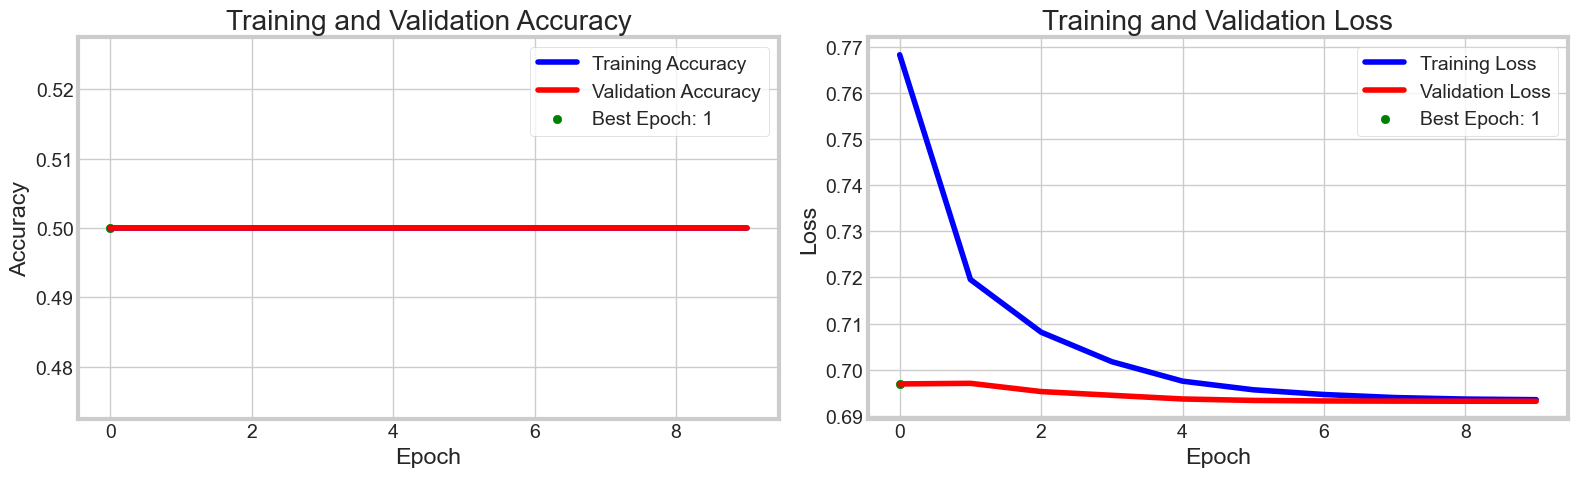

In [121]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [3]:
%jupyter nbconvert --to notebook --execute A_4.html

UsageError: Line magic function `%jupyter` not found.
